In [ ]:
#Upload data from device
from google.colab import files
uploaded = files.upload()

Saving balanced_dataset.csv to balanced_dataset (6).csv


In [ ]:
#reading the data
import pandas as pd
df = pd.read_csv('balanced_dataset.csv')
df

,review,label
0,"not bad stay pretty pleasant, alarm going 3 no...",POSITIVE
1,westin times square cheats customer starwood p...,NEGATIVE
2,good news/ bad news seattle just night opted l...,POSITIVE
3,expectations booked riu bambu online having st...,NEGATIVE
4,hospital stayed 2 weeks got sick stomach upset...,NEGATIVE
...,...,...
17835,great location pay stayed palace times visit s...,NEGATIVE
17836,"simply awful, hotel bad state repair, time sta...",NEGATIVE
17837,This was my second time staying here with my d...,POSITIVE
17838,n't worry old reviews just returned staying hi...,POSITIVE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17840 entries, 0 to 17839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  17840 non-null  object
 1   label   17840 non-null  object
dtypes: object(2)
memory usage: 278.9+ KB


In [ ]:
df['label'].value_counts()

,count
label,
POSITIVE,8920
NEGATIVE,8920


In [ ]:
#check if there are unknown data meaning
def check_unknown_words(text):
    import re
    pattern = '[^\x00-\x7F]+'
    return re.findall(pattern, text)

df['unknown_words'] = df['review'].apply(check_unknown_words)
df['unknown_words']

,unknown_words
0,[]
1,[]
2,[]
3,[]
4,[Çî]
...,...
17835,[Ç]
17836,[]
17837,[…]
17838,[]


In [ ]:
!pip install deep-translator

In [ ]:
from deep_translator import GoogleTranslator

translated_text = GoogleTranslator(source='auto', target='en').translate("नमस्ते")
print(translated_text)

Goodbye


In [ ]:
!pip list | grep httpx

httpx                                 0.13.3


In [ ]:
# Define translation function
def translate_text(text):
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
        return translated
    except Exception as e:
        print(f"Error in translation: {e}")
        return text

# Apply the function to your dataset
df['review'] = df['review'].apply(translate_text)

# Print sample translated reviews
print(df[['review']].head(936))


Streaming output truncated to the last 5000 lines.
Error in translation: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Error in translation: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Error in translation: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Error in translation: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and 

In [ ]:
# text lowercase
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['label'] = df['label'].str.lower()


print(df.head())

                                              review     label unknown_words
0  not bad stay pretty pleasant, alarm going 3 no...  positive            []
1  westin times square cheats customer starwood p...  negative            []
2  good news/ bad news seattle just night opted l...  positive            []
3  expectations booked riu bambu online having st...  negative            []
4  hospital stayed 2 weeks got sick stomach upset...  negative          [Çî]


In [ ]:
!pip install emoji

In [ ]:
#check if data has emojis
import emoji

def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in str(text))

df['has_emoji'] = df['review'].apply(contains_emoji)

df_with_emojis = df[df['has_emoji'] == True]
print(df_with_emojis.head())

                                                review     label  \
77   worst 👎👎👎👎👎. never go there they are theif. th...  negative   
162  this is not a place ; this is an emotion. the ...  positive   
261  very nice use and student friendly means pocke...  negative   
275  the breakfast and dinner options were fabulous...  positive   
307  paris hiccaps, succumbing rave reviews similar...  positive   

                                         unknown_words  has_emoji  
77                                          [👎👎👎👎👎, …]       True  
162                                          [😍, ’, …]       True  
261  [খুবই, সুন্দর, ব্যবহার, এবং, মানে, পকেট, 😂।, আ...       True  
275                                             [😃, …]       True  
307                       [Çî, Ç, é, Ç, é, Ä, Ç, ©¢]       True  


In [ ]:
# Convert emojis into words
!pip install emot

In [ ]:
# Importing libraries
from emot.emo_unicode import UNICODE_EMOJI,EMOTICONS_EMO

# Function for converting emojis into words
def converting_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",", "").replace(":", "").split()))
    return text


df['review'] = df['review'].apply(converting_emojis)

print(df['review'].head(308))

0      not bad stay pretty pleasant, alarm going 3 no...
1      westin times square cheats customer starwood p...
2      good news/ bad news seattle just night opted l...
3      expectations booked riu bambu online having st...
4      hospital stayed 2 weeks got sick stomach upset...
                             ...                        
303    great place stay, clean large rooms friendly h...
304    the worst hotel in bolpur. receptionist, staff...
305    don't be fooled with the look of the images sh...
306    this hotel is designed, managed and staffed to...
307    paris hiccaps, succumbing rave reviews similar...
Name: review, Length: 308, dtype: object


In [ ]:
#Removing Punctuation
import re
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s\']', '', str(x)))
df['review']

,review
0,not bad stay pretty pleasant alarm going 3 no ...
1,westin times square cheats customer starwood p...
2,good news bad news seattle just night opted lo...
3,expectations booked riu bambu online having st...
4,hospital stayed 2 weeks got sick stomach upset...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,this was my second time staying here with my d...
17838,n't worry old reviews just returned staying hi...


In [ ]:
#Remove extra spaces
df['review'] = df['review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


# Remove unnecessary numbers
df['review'] = df['review'].apply(lambda x: re.sub(r'\d+', '', x))
df['review']

,review
0,not bad stay pretty pleasant alarm going no p...
1,westin times square cheats customer starwood p...
2,good news bad news seattle just night opted lo...
3,expectations booked riu bambu online having st...
4,hospital stayed weeks got sick stomach upsets...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,this was my second time staying here with my d...
17838,n't worry old reviews just returned staying hi...


In [ ]:
!pip uninstall -y torch
!pip install torch==2.0.1
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu124


Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
  Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached triton-2.0.0-1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.0 kB)
Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl (619.9 MB)
Using cached triton-2.0.0-1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (63.3 MB)
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.0.1 which is incompatible.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.0.1 which is incompatible.
Found e

In [ ]:
# spacy to To exclude negative words from stop words
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# to extract negative words using spacy
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_negation_words_spacy(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if token.dep_ == "neg"]

In [ ]:
negation_words = ['no', 'not', 'nor', "don't","doesn't","never", "didn't", "can't", "won't", "couldn't", "shouldn't", "wouldn't", "n't"]

# combine all negative words
def get_all_negation_words(text):

    neg_spacy = extract_negation_words_spacy(text)

    tokens = text.lower().split()
    manual_found = [word for word in negation_words if word in tokens]

    return list(set(neg_spacy + manual_found))

df['negation_words'] = df['review'].apply(get_all_negation_words)


In [ ]:
#Removing Stop Words
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Removing Stop Words
from nltk.corpus import stopwords

stop = stopwords.words('english')

# Exclude important negative words from stop words (customize this list as needed)
negation_words = ['no', 'not', 'nor',"don't","doesn't","never", "didn't", "can't", "won't", "couldn't", "shouldn't", "wouldn't", "n't"]
custom_stop = [word for word in stop if word not in negation_words]

df['review'] = df['review'].apply(lambda x: " ".join(word for word in x.split() if word not in custom_stop))

In [ ]:
#import necessary libraries for tokenization
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
#Tokenizing Text
from nltk.tokenize import word_tokenize

df['review_tokens'] = df['review'].apply(lambda x: word_tokenize(str(x)))
print(df[['review', 'review_tokens']].head())

                                              review  \
0  not bad stay pretty pleasant alarm going no pr...   
1  westin times square cheats customer starwood p...   
2  good news bad news seattle night opted locatio...   
3  expectations booked riu bambu online stayed ri...   
4  hospital stayed weeks got sick stomach upsets ...   

                                       review_tokens  
0  [not, bad, stay, pretty, pleasant, alarm, goin...  
1  [westin, times, square, cheats, customer, star...  
2  [good, news, bad, news, seattle, night, opted,...  
3  [expectations, booked, riu, bambu, online, sta...  
4  [hospital, stayed, weeks, got, sick, stomach, ...  


In [ ]:
#install necessary libariries
nltk.download('wordnet')
nltk.download('omw-1.4') #for post-of_speech method
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#POS for making lemmatization more effecient
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
#Lemmatize the data using  WordNetLemmatizer

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def lemmatize_tokens(tokens):
    # POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []

    for word, tag in pos_tags:

        wordnet_pos = get_wordnet_pos(tag)

        lemmatized_word = lemmatizer.lemmatize(word, wordnet_pos)
        lemmatized_words.append(lemmatized_word)

    return lemmatized_words


df['review_lemmatized'] = df['review_tokens'].apply(lemmatize_tokens)
print(df[['review_tokens', 'review_lemmatized']].head())

                                       review_tokens  \
0  [not, bad, stay, pretty, pleasant, alarm, goin...   
1  [westin, times, square, cheats, customer, star...   
2  [good, news, bad, news, seattle, night, opted,...   
3  [expectations, booked, riu, bambu, online, sta...   
4  [hospital, stayed, weeks, got, sick, stomach, ...   

                                   review_lemmatized  
0  [not, bad, stay, pretty, pleasant, alarm, go, ...  
1  [westin, time, square, cheat, customer, starwo...  
2  [good, news, bad, news, seattle, night, opt, l...  
3  [expectation, book, riu, bambu, online, stay, ...  
4  [hospital, stay, week, get, sick, stomach, ups...  


In [ ]:
#Compute the frequency of all words in the reviews
from nltk.probability import FreqDist

all_text = ' '.join(df['review_lemmatized'].apply(lambda x: ' '.join(x)))
freq_dist = FreqDist(all_text.split())
freq_dict = dict(freq_dist)
freq_dist

FreqDist({'room': 29007, 'hotel': 28193, 'not': 21093, 'stay': 14937, 'good': 11335, "n't": 11078, 'staff': 9355, 'read': 8962, 'great': 8694, 'no': 7850, ...})

In [ ]:
!pip install wordcloud

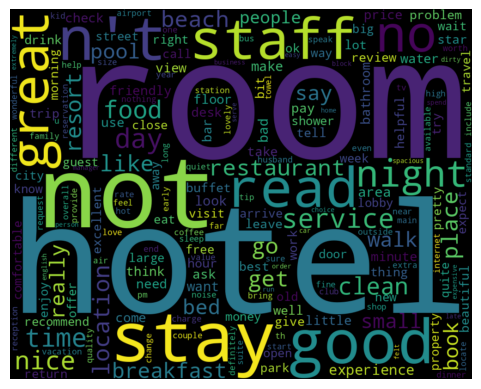

In [ ]:
# Build a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud_review = WordCloud(width=1000, height=800, background_color='black').generate_from_frequencies(freq_dict)
plt.imshow(cloud_review, interpolation='bilinear')

plt.axis('off')
plt.show()

In [ ]:
!pip install textblob

In [ ]:
print(df.head())  # Ensure 'review' column has data

                                              review  label unknown_words  \
0  not bad stay pretty pleasant alarm going no pr...      1            []   
1  westin times square cheats customer starwood p...      0            []   
2  good news bad news seattle night opted locatio...      1            []   
3  expectations booked riu bambu online stayed ri...      0            []   
4  hospital stayed weeks got sick stomach upsets ...      0          [Çî]   

   has_emoji       negation_words  \
0      False            [no, not]   
1      False                [not]   
2      False                   []   
3      False  [no, n't, nor, not]   
4      False                [not]   

                                       review_tokens  \
0  [not, bad, stay, pretty, pleasant, alarm, goin...   
1  [westin, times, square, cheats, customer, star...   
2  [good, news, bad, news, seattle, night, opted,...   
3  [expectations, booked, riu, bambu, online, sta...   
4  [hospital, stayed, weeks, got, 

In [ ]:
from textblob import TextBlob

# Define function to extract n-grams
def generate_ngrams(text, n):
    return TextBlob(text).ngrams(n)

# Apply function to your dataset
df['bigrams'] = df['review'].apply(lambda x: generate_ngrams(str(x), 2))
df['trigrams'] = df['review'].apply(lambda x: generate_ngrams(str(x), 3))

print(df[['review', 'bigrams', 'trigrams']].head())

                                              review  \
0  not bad stay pretty pleasant alarm going no pr...   
1  westin times square cheats customer starwood p...   
2  good news bad news seattle night opted locatio...   
3  expectations booked riu bambu online stayed ri...   
4  hospital stayed weeks got sick stomach upsets ...   

                                             bigrams  \
0  [[not, bad], [bad, stay], [stay, pretty], [pre...   
1  [[westin, times], [times, square], [square, ch...   
2  [[good, news], [news, bad], [bad, news], [news...   
3  [[expectations, booked], [booked, riu], [riu, ...   
4  [[hospital, stayed], [stayed, weeks], [weeks, ...   

                                            trigrams  
0  [[not, bad, stay], [bad, stay, pretty], [stay,...  
1  [[westin, times, square], [times, square, chea...  
2  [[good, news, bad], [news, bad, news], [bad, n...  
3  [[expectations, booked, riu], [booked, riu, ba...  
4  [[hospital, stayed, weeks], [stayed, weeks, go..

In [ ]:
df = df.dropna(subset=['review'])  # Remove rows where 'review' is NaN
df['review'] = df['review'].astype(str)  # Convert reviews to string format

In [ ]:
vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words=None)  # Allow all words
X_bigrams = vectorizer_bigrams.fit_transform(df['review'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert reviews into bigram features
vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2))
X_bigrams = vectorizer_bigrams.fit_transform(df['review'])

# Convert reviews into trigram features
vectorizer_trigrams = CountVectorizer(ngram_range=(3, 3))
X_trigrams = vectorizer_trigrams.fit_transform(df['review'])

# Print feature information
print("Bigram Feature Matrix Shape:", X_bigrams.shape)
print("Trigram Feature Matrix Shape:", X_trigrams.shape)
print("Sample Bigram Features:", vectorizer_bigrams.get_feature_names_out()[:20])
print("Sample Trigram Features:", vectorizer_trigrams.get_feature_names_out()[:20])

Bigram Feature Matrix Shape: (17840, 599416)
Trigram Feature Matrix Shape: (17840, 1028854)
Sample Bigram Features: ['00 00' '00 00am' '00 00pm' '00 10' '00 11' '00 12' '00 13' '00 15'
 '00 20' '00 21' '00 22' '00 24' '00 30' '00 329' '00 50' '00 75' '00 79'
 '00 a1regal' '00 account' '00 actually']
Sample Trigram Features: ['00 00 10' '00 00 30' '00 00 afternoon' '00 00 atmosphere' '00 00 kids'
 '00 00 knock' '00 00 pm' '00 00 quite' '00 00 rooms' '00 00 said'
 '00 00am reserve' '00 00pm vacation' '00 10 00' '00 10 00am' '00 11 00'
 '00 12 00' '00 12 07' '00 12 30' '00 12 hours' '00 12 min']


In [ ]:
print(df['review'].head())  # See sample reviews
print(df['review'].isnull().sum())  # Count missing values
print(df.shape)  # Ensure the DataFrame has rows

0    not bad stay pretty pleasant, alarm going 3 no...
1    westin times square cheats customer starwood p...
2    good news/ bad news seattle just night opted l...
3    expectations booked riu bambu online having st...
4    hospital stayed 2 weeks got sick stomach upset...
Name: review, dtype: object
0
(17840, 2)


In [ ]:
print(df.columns)  # Verify 'review' column exists

Index(['review', 'label'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Ensure 'label' column has the correct mapping (assuming you have a 'label' column)
label_mapping = {'positive': 1, 'negative': 0}
df['label'] = df['label'].map(label_mapping)

# 1. Before applying CountVectorizer, check for empty reviews:
df = df[df['review'].str.strip() != ''] #remove empty reviews
df.reset_index(drop=True, inplace=True)

# Convert reviews into bigram features (re-generate features after filtering df)
# Adjust min_df and max_df:
# - min_df: Ignore terms that appear in less than 2 documents (lowered from 5).
# - max_df: Ignore terms that appear in more than 90% of the documents (increased from 0.8).
vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2), min_df=2, max_df=0.9)
X_bigrams = vectorizer_bigrams.fit_transform(df['review'])  # Fit to the updated df

# Reset the index to ensure y has the same index as X_bigrams
df.reset_index(drop=True, inplace=True)

# Select the feature set (N-grams) and target variable from the UPDATED df
X = X_bigrams
y = df['label']

# Now you should have consistent shapes for X and y
print(X.shape, y.shape)

# Split into training and test

(17840, 142996) (17840,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(penalty='l2', C=0.1)  # Adjust 'C' for regularization strength
log_reg.fit(X_train, y_train)

# Training Accuracy
y_train_pred_log = log_reg.predict(X_train)
train_acc_log = accuracy_score(y_train, y_train_pred_log)

# Testing Accuracy
y_test_pred_log = log_reg.predict(X_test)
test_acc_log = accuracy_score(y_test, y_test_pred_log)

print(f"Logistic Regression - Training Accuracy: {train_acc_log:.4f}")
print(f"Logistic Regression - Testing Accuracy: {test_acc_log:.4f}")

Logistic Regression - Training Accuracy: 0.8841
Logistic Regression - Testing Accuracy: 0.8551


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(C=0.1)  # Lower C to reduce overfitting
svm_model.fit(X_train, y_train)

# Training Accuracy
y_train_pred_svm = svm_model.predict(X_train)
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)

# Testing Accuracy
y_test_pred_svm = svm_model.predict(X_test)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"SVM - Training Accuracy: {train_acc_svm:.4f}")
print(f"SVM - Testing Accuracy: {test_acc_svm:.4f}")

SVM - Training Accuracy: 0.9058
SVM - Testing Accuracy: 0.8562


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, max_features='sqrt')
rf_model.fit(X_train, y_train)

# Training Accuracy
y_train_pred_rf = rf_model.predict(X_train)
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)

# Testing Accuracy
y_test_pred_rf = rf_model.predict(X_test)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest - Training Accuracy: {train_acc_rf:.4f}")
print(f"Random Forest - Testing Accuracy: {test_acc_rf:.4f}")

Random Forest - Training Accuracy: 0.7831
Random Forest - Testing Accuracy: 0.7688


In [ ]:
print(df.columns)  # List all columns
print(df.head())  # Show first few rows

Index(['review', 'label'], dtype='object')
                                              review  label
0  not bad stay pretty pleasant, alarm going 3 no...    NaN
1  westin times square cheats customer starwood p...    NaN
2  good news/ bad news seattle just night opted l...    NaN
3  expectations booked riu bambu online having st...    NaN
4  hospital stayed 2 weeks got sick stomach upset...    NaN


In [ ]:
print(df['label'].isnull().sum())  # Count missing labels
print(df.shape)  # Check dataset size

17840
(17840, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])  # Fit on review texts

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(df['review'])

# Pad sequences to ensure uniform length
X_padded = pad_sequences(X_sequences, maxlen=200, truncating='post', padding='post')

print("Tokenized Review Shape:", X_padded.shape)  # Should match dataset size

Tokenized Review Shape: (17840, 200)


In [ ]:
import numpy as np

y = np.array(df['label'])  # Convert labels to NumPy array
print("Label Shape:", y.shape)  # Should match X_padded's first dimension

Label Shape: (17840,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define model architecture
model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=200),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())  # Display model structure

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Train LSTM model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 190s 855ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 189s 846ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 198s 830ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 214s 885ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 199s 870ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan


In [ ]:
print(df.info())  # Check dataset structure
print(df.head())  # Preview a few rows
print(df.isnull().sum())  # See if missing values exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17840 entries, 0 to 17839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  17840 non-null  object
 1   label   17840 non-null  object
dtypes: object(2)
memory usage: 278.9+ KB
None
                                              review     label
0  not bad stay pretty pleasant, alarm going 3 no...  POSITIVE
1  westin times square cheats customer starwood p...  NEGATIVE
2  good news/ bad news seattle just night opted l...  POSITIVE
3  expectations booked riu bambu online having st...  NEGATIVE
4  hospital stayed 2 weeks got sick stomach upset...  NEGATIVE
review    0
label     0
dtype: int64
